### Линейная регрессия. Заключительная практика.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing # полиномиальные признаки
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
# чтение файла и создание копии
data = pd.read_csv('data/insurance.csv')
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
display(df.shape) #размер дата фрейма
display(df.info()) #информация о фрейме
display(df.isnull().sum()) #сумма пропусков по каждому признаку
display(df.dtypes) # просмотр типа данных

(1338, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.nunique() #анализ количества уникальных значений по каждому признаку

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Признаки $SEX$ и $SMOKER$ бинарные, закодируем следующим образом:
<br>SEX - 0-female, 1-male
<br>SMOKER - 0-некурящий, 1-курящий

In [5]:
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1) #бинарно кодируем курящих
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1) #бинарно кодируем мужчин и женщин
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [6]:
# оставшиqся категориальнsq признак - region кодируем OneHot (горячее кодирование)
df = pd.get_dummies(df)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [7]:
# Факторы (признаки) и целевой признак разводим по отдельным таблицам
features = df.drop('charges', axis=1).columns
X, y = df[features], df['charges']

In [8]:
# разделим данные натренировочную и тестовую выборки 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1070, 9)
Test shape: (268, 9)


In [13]:
#Обучение модели (LinearRegression) и поиск intercept (свободный члеy W0)
lr = linear_model.LinearRegression() # создаем объект класса LinearRegression
lr.fit(X_train, y_train) #обучаем модель на тренировочной выборке
display(round(lr.intercept_, 3))

-12390.804

С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R2, MAE, MAPE.<br>
Значение R2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

In [14]:
# функция для подсчета метрик R^2, MAE, MAPE для тренировочной и тестовой выборок

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R^2: {metrics.r2_score(y_train, y_train_predict):.3f}')
    print(f'Train MAE: {metrics.mean_absolute_error(y_train, y_train_predict):.3f}')
    print(f'Train MAPE: {(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100):.3f}')
    print('\n')
    print(f'Test R^2: {metrics.r2_score(y_test, y_test_predict):.3f}')
    print(f'Test MAE: {(metrics.mean_absolute_error(y_test, y_test_predict)):.3f}')
    print(f'Testt MAPE: {(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100):.3f}')

In [16]:
#делаем пресказания на тренировочной и тестовой выборках
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Testt MAPE: 46.888


Построить диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки берем разницу между истинным ответом и предсказанием (без модуля)

Text(0, 0.5, 'Model')

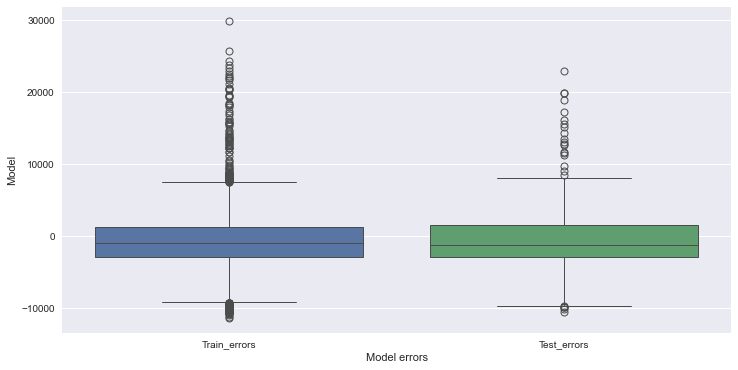

In [33]:
# вычисляем разницу
y_train_errors = y_train - y_train_pred
y_test_errors = y_test - y_test_pred

# из полученных series создаем DataFrame
df_errors = pd.DataFrame(
    {'Train_errors':y_train_errors,
     'Test_errors':y_test_errors}
)

# Визуализируем ошибки через boxplot
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость и размер
sns.boxplot(data=df_errors, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model') #название оси ординат

Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.<br>
На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

In [38]:
# нормализуем выборки
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# создаем полиномиальные признаки второй степени
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

#возвращаем количество признаков в выборках
print(f'Train shape: {X_train_scaled_poly.shape}')
print(f'Test shape: {X_test_scaled_poly.shape}')

Train shape: (1070, 54)
Test shape: (268, 54)


Обучим модель на полиномиальных признаках. Вясним чему равно значение R2 на тестовой выборке.

In [ ]:
# обучение модели на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

# приминение обученной модели
y_train_poly_predict = lr_poly.predict(X_train_scaled_poly)
y_test_poly_predict = lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_poly_predict, y_test, y_test_poly_predict)

In [ ]:
# выведем значения коэфф модели, округлив их о третьего знака
print(lr_poly.coef_)
# коеффициенты высокие, значит модель не устойчива, необходима регуляризация

Произведем регуляризацию $L1$, $alpha$ - по умолчанию, $max$ _ $iter$ = 2000<br>
работаем с X_train_scaled_poly

In [55]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000, alpha=1) # alpha по умолчанию = 1
lasso_lr_poly.fit(X_train_scaled_poly, y_train) #обучаем модель с регуляризацией L1

# приминение обученной модели
y_train_poly_predict_lasso = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_poly_predict_lasso = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_poly_predict_lasso, y_test, y_test_poly_predict_lasso)

Train R^2: 0.842
Train MAE: 2890.473
Train MAPE: 29.401


Test R^2: 0.867
Test MAE: 2719.334
Testt MAPE: 30.070


Произведем регуляризацию $L2$, $alpha$ - по умолчанию<br>
работаем с X_train_scaled_poly

In [50]:
ridge_lr_poly = linear_model.Ridge(alpha=1) #регуляризируем модель L2
ridge_lr_poly.fit(X_train_scaled_poly, y_train) #обучаем модель с регуляризацией L2

# применяем обученную модель
y_train_poly_predict_ridge = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_poly_predict_ridge = ridge_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_poly_predict_ridge, y_test, y_test_poly_predict_ridge)

Train R^2: 0.839
Train MAE: 2948.804
Train MAPE: 29.546


Test R^2: 0.863
Test MAE: 2860.555
Testt MAPE: 31.380


In [ ]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt